In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\Lalitha\OneDrive\Desktop\project_spatial_datamining-main\data\cleaned\wq_lakes.csv' 
df = pd.read_csv(file_path)

In [5]:
print(df.head())

  StationNumber  Latitude  Longitude       SampleDatetime RiverSubBasinCode  \
0    AB07BB0310  53.88431 -114.21019  2018-05-22 11:22:10              07BB   
1    AB07BB0310  53.88431 -114.21019  2018-05-22 11:23:50              07BB   
2    AB07BB0310  53.88431 -114.21019  2018-05-22 11:27:51              07BB   
3    AB07BB0310  53.88431 -114.21019  2018-05-22 11:33:33              07BB   
4    AB07BB0310  53.88431 -114.21019  2018-05-22 11:39:15              07BB   

   100923 PH (FIELD) pH units  80558 OXYGEN DISSOLVED (FIELD METER) mg/L  \
0                        8.60                                       9.58   
1                        8.63                                       9.93   
2                        8.62                                      10.02   
3                        8.59                                      10.13   
4                        8.44                                       9.31   

   100924 SPECIFIC CONDUCTANCE (FIELD) uS/cm  100925 TEMPERATURE WAT

In [7]:
columns_for_pca = [
    '100923 PH (FIELD) pH units',
    '80558 OXYGEN DISSOLVED (FIELD METER) mg/L',
    '100924 SPECIFIC CONDUCTANCE (FIELD) uS/cm',
    '100925 TEMPERATURE WATER deg C',
    'Elevation',
    'Slope',
    'LC_1km',
    'LC_5km',
    'NDVI',
    'Temperature',
    'Precipitation',
    'RP_count'
]

df_pca = df[columns_for_pca]

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

In [11]:
pca = PCA(n_components= None)
pca_result = pca.fit_transform(df_scaled)

In [15]:
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Show the PCA DataFrame
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.285599  1.266415 -1.334561  0.007243 -0.634342 -0.519179 -0.930259   
1  0.202707  1.193814 -1.394285 -0.004080 -0.562369 -0.508277 -0.868885   
2  0.188843  1.179313 -1.399439 -0.004111 -0.551375 -0.507329 -0.863893   
3  0.175818  1.159821 -1.397111 -0.001331 -0.543074 -0.508196 -0.867086   
4  0.095936  0.802611 -1.388728  0.014335 -0.545016 -0.482065 -0.869243   

        PC8       PC9      PC10      PC11      PC12  
0 -0.226433  0.273476  0.232333  0.441515  0.128292  
1 -0.243191  0.049266  0.243832  0.625835  0.172017  
2 -0.244861  0.031817  0.225837  0.658403  0.171913  
3 -0.244971  0.043411  0.184036  0.688770  0.162029  
4 -0.238786  0.075428  0.156588  0.689029  0.161872  


In [17]:
explained_variance = pca.explained_variance_ratio_

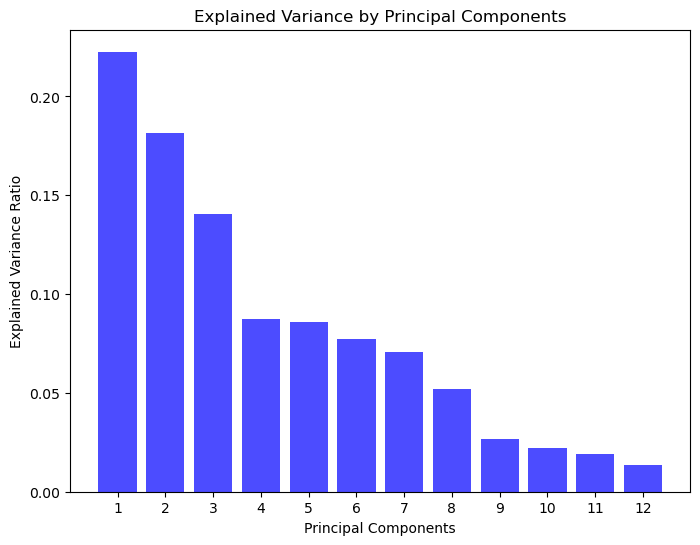

In [59]:
# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

We can neglect from PC5 since The higher the bar, the more significant the PC is.

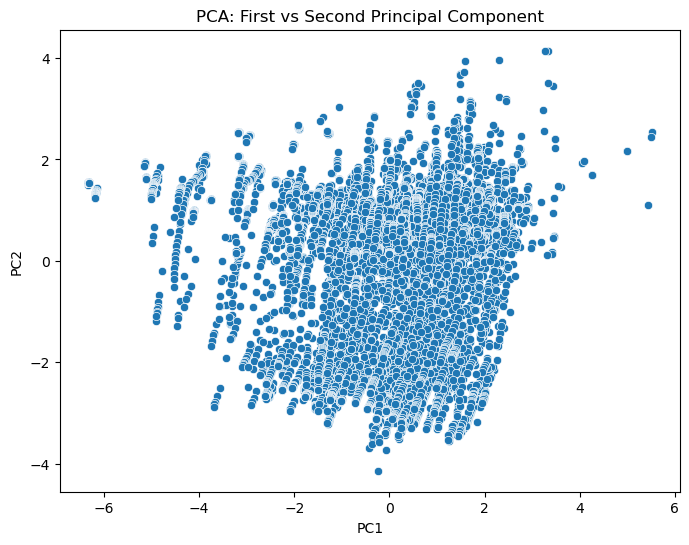

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA: First vs Second Principal Component')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [61]:
import numpy as np

# Get the PCA loadings (eigenvectors)
loadings = pca.components_[:2]  # Extract PC1 and PC2 loadings

# Create a DataFrame with feature contributions
loading_df = pd.DataFrame(loadings.T, index=columns_for_pca, columns=['PC1', 'PC2'])

# Display the contributions of each feature
print(loading_df)

                                                PC1       PC2
100923 PH (FIELD) pH units                 0.156776  0.576206
80558 OXYGEN DISSOLVED (FIELD METER) mg/L -0.033304  0.611234
100924 SPECIFIC CONDUCTANCE (FIELD) uS/cm  0.190551  0.017101
100925 TEMPERATURE WATER deg C             0.272805  0.489654
Elevation                                 -0.384274  0.128743
Slope                                     -0.159614  0.082234
LC_1km                                     0.364829 -0.088359
LC_5km                                     0.461390 -0.090080
NDVI                                       0.348740 -0.068380
Temperature                                0.338600 -0.053007
Precipitation                              0.201098 -0.051170
RP_count                                  -0.260281  0.070447


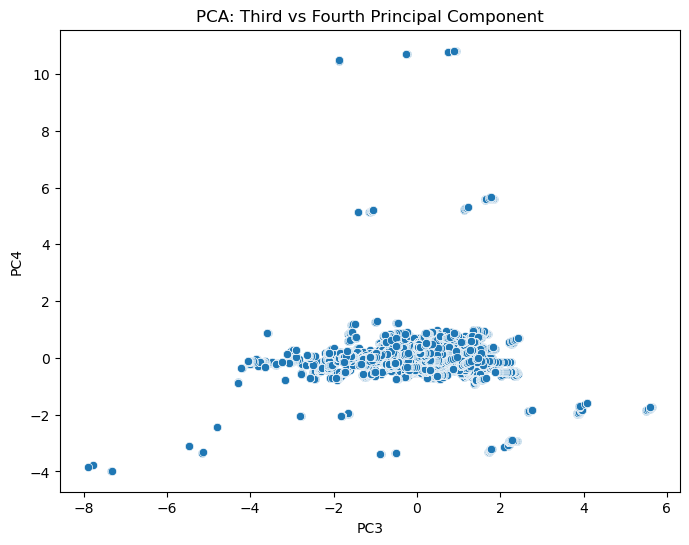

In [29]:
# Scatter plot of the third vs fourth principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_df['PC3'], y=pca_df['PC4'])
plt.title('PCA: Third vs Fourth Principal Component')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

In [31]:
# Get the loading vectors for all principal components
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)], 
                        index=columns_for_pca)

# Display loadings for PC3 and PC4
print("Feature Contributions to PC3 and PC4:")
print(loadings[['PC3', 'PC4']])


Feature Contributions to PC3 and PC4:
                                                PC3       PC4
100923 PH (FIELD) pH units                -0.116495 -0.069161
80558 OXYGEN DISSOLVED (FIELD METER) mg/L -0.038171 -0.012721
100924 SPECIFIC CONDUCTANCE (FIELD) uS/cm -0.277966 -0.163711
100925 TEMPERATURE WATER deg C             0.163891  0.024125
Elevation                                  0.124693  0.237298
Slope                                      0.027713  0.823853
LC_1km                                    -0.403193  0.178804
LC_5km                                    -0.339890  0.136714
NDVI                                       0.510061  0.068771
Temperature                                0.505855  0.050609
Precipitation                              0.255114 -0.089394
RP_count                                   0.072835 -0.408270


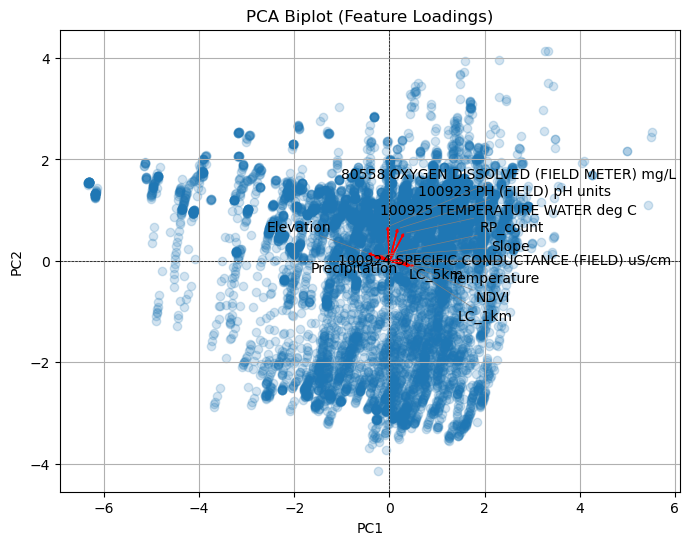

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text  # For preventing overlap

# Perform PCA (assuming df_scaled is your standardized dataset)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Get feature loadings (eigenvectors)
loadings = pca.components_.T

# Create figure
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of data points (optional)
ax.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.2)

# Add feature vectors
feature_names = columns_for_pca  # List of column names used in PCA
texts = []  # To store text labels for adjustment

for i, feature in enumerate(feature_names):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], 
             head_width=0.05, head_length=0.05, color='red')
    text = ax.text(loadings[i, 0] * 1.1, loadings[i, 1] * 1.1, feature, 
                   color='black', fontsize=10)
    texts.append(text)

# Adjust text labels to prevent overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

# Labels and Title
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_title("PCA Biplot (Feature Loadings)")
ax.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.5)
plt.grid()

# Show plot
plt.show()


Inference: 
1. Significant variables from the dataset are: Dissolved Oxygen, Water temperature,specific conductance and elevation.
2. More clusters in the centre, referring to few outliers.
3. Temperature water and specific conductance seem to be positively correlated.
4. Oxygen dissolved is in different direction, so negatively correlated with temperature water. 

TRYING RANDOM FOREST REGRESSOR ON PC1 AND PC2 FEATURES OBTAINED FROM PCA

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

target = df['100923 PH (FIELD) pH units']  
X_pca = pca_result[:, :2]  # PC1 and PC2
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=42)


In [72]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on PCA-transformed data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [74]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.04738020387765677
R² Score: 0.8658067142579853


TRYING RANDOM FOREST REGRESSOR WITH ORIGINAL FEATURES

In [76]:
target = df['100923 PH (FIELD) pH units'] 

In [78]:
features = df.drop(columns=['100923 PH (FIELD) pH units']) 

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [86]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [88]:
# Identify columns with non-numeric values
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: Index(['StationNumber', 'SampleDatetime', 'RiverSubBasinCode'], dtype='object')


In [96]:
df_cleaned = df.drop(columns=non_numeric_cols)

In [104]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train['StationNumber'] = label_encoder.fit_transform(X_train['StationNumber'])
X_train['RiverSubBasinCode'] = label_encoder.fit_transform(X_train['RiverSubBasinCode'])

In [106]:
X_train = pd.get_dummies(X_train, columns=['StationNumber', 'RiverSubBasinCode'])


In [108]:
# Convert to datetime format
X_train['SampleDatetime'] = pd.to_datetime(X_train['SampleDatetime'], errors='coerce')

# Extract year, month, and day (or other time-based features as needed)
X_train['Year'] = X_train['SampleDatetime'].dt.year
X_train['Month'] = X_train['SampleDatetime'].dt.month
X_train['Day'] = X_train['SampleDatetime'].dt.day
X_train['Hour'] = X_train['SampleDatetime'].dt.hour


In [110]:
# Check for missing values
print(X_train.isna().sum())

Latitude                                     0
Longitude                                    0
SampleDatetime                               0
80558 OXYGEN DISSOLVED (FIELD METER) mg/L    0
100924 SPECIFIC CONDUCTANCE (FIELD) uS/cm    0
                                            ..
RiverSubBasinCode_33                         0
RiverSubBasinCode_34                         0
RiverSubBasinCode_35                         0
Day                                          0
Hour                                         0
Length: 132, dtype: int64


In [116]:
# Convert 'SampleDatetime' to datetime type
X_train['SampleDatetime'] = pd.to_datetime(X_train['SampleDatetime'])

# Extract year, month, day, hour, etc.
X_train['Year'] = X_train['SampleDatetime'].dt.year
X_train['Month'] = X_train['SampleDatetime'].dt.month
X_train['Day'] = X_train['SampleDatetime'].dt.day
X_train['Hour'] = X_train['SampleDatetime'].dt.hour

# Drop the original 'SampleDatetime' column
X_train = X_train.drop(columns=['SampleDatetime'])

# Check the data types of the features
print(X_train.dtypes)

# Now you can train the model
rf_model.fit(X_train, y_train)


Latitude                                     float64
Longitude                                    float64
80558 OXYGEN DISSOLVED (FIELD METER) mg/L    float64
100924 SPECIFIC CONDUCTANCE (FIELD) uS/cm    float64
100925 TEMPERATURE WATER deg C               float64
                                              ...   
RiverSubBasinCode_33                            bool
RiverSubBasinCode_34                            bool
RiverSubBasinCode_35                            bool
Day                                            int32
Hour                                           int32
Length: 131, dtype: object


RandomForestRegressor(random_state=42)

In [119]:
print(X_train.columns)
print(X_test.columns)


Index(['Latitude', 'Longitude', '80558 OXYGEN DISSOLVED (FIELD METER) mg/L',
       '100924 SPECIFIC CONDUCTANCE (FIELD) uS/cm',
       '100925 TEMPERATURE WATER deg C', 'Year', 'Month', 'Elevation', 'Slope',
       'LC_1km',
       ...
       'RiverSubBasinCode_28', 'RiverSubBasinCode_29', 'RiverSubBasinCode_30',
       'RiverSubBasinCode_31', 'RiverSubBasinCode_32', 'RiverSubBasinCode_33',
       'RiverSubBasinCode_34', 'RiverSubBasinCode_35', 'Day', 'Hour'],
      dtype='object', length=131)
Index(['StationNumber', 'Latitude', 'Longitude', 'SampleDatetime',
       'RiverSubBasinCode', '80558 OXYGEN DISSOLVED (FIELD METER) mg/L',
       '100924 SPECIFIC CONDUCTANCE (FIELD) uS/cm',
       '100925 TEMPERATURE WATER deg C', 'Year', 'Month', 'Elevation', 'Slope',
       'LC_1km', 'LC_5km', 'NDVI', 'Temperature', 'Precipitation', 'RP_count'],
      dtype='object')


In [123]:
# Align X_test columns with X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

X_test = X_test.drop(columns=['SampleDatetime', 'StationNumber'], errors='ignore')

# Re-train and predict
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [125]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.04717764201618973
R-squared: 0.8663804230969441
